In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.wcs import WCS

In [9]:
hdul = fits.open('/home/tehan/Documents/ShaneAO/20240128/Results/TIC_456334158_final_filter_Ks.fits')
wcs = WCS(hdul[0].header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 134.898045  53.73132  
CRPIX : 700.0  -300.0  
PC1_1 PC1_2  : 3.32841e-14  9.44444e-06  
PC2_1 PC2_2  : -9.44444e-06  3.32841e-14  
CDELT : 1.0  1.0  
NAXIS : 600  600

In [10]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  600                                                  
NAXIS2  =                  600                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                700.0 / Pixel coordinate of reference point            
CRPIX2  =               -300.0 / Pixel coordinate of reference point            
PC1_1   =          3.32841E-14 / Coordinate transformation matrix element       
PC1_2   =          9.44444E-06 / Coordinate transformation matrix element       
PC2_1   =         -9.44444E-06 / Coordinate transformation matrix element       
PC2_2   =          3.32841E-14 / Coordinate transformation matrix element       
CDELT1  =                  1

In [11]:
np.shape(hdul[0].data)

(600, 600)

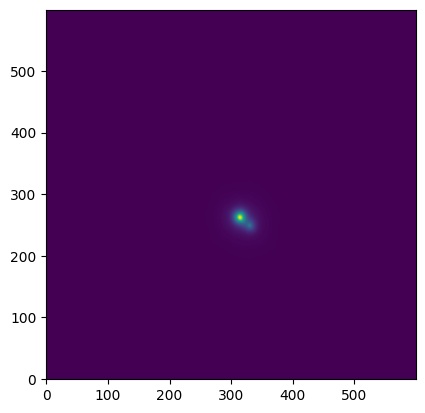

In [12]:
plt.imshow(hdul[0].data, origin='lower')

In [13]:
from astropy.coordinates import FK5, ICRS
coord = wcs.pixel_to_world([320], [280])
print(coord)
print(coord.transform_to(ICRS))
print(coord.transform_to(FK5(equinox='J2015.5')))

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(134.90732144, 53.73489908)]>
<SkyCoord (ICRS): (ra, dec) in deg
    [(134.90731796, 53.73490478)]>
<SkyCoord (FK5: equinox=J2015.500): (ra, dec) in deg
    [(135.1889146, 53.67383175)]>


In [14]:
from astropy.nddata import Cutout2D
original_data = hdul[0].data
original_header = hdul[0].header
original_wcs = WCS(original_header)
position = (300,300)  # Example position (x, y) in pixels
size = (600, 600)  # Example size (width, height) in pixels
cutout = Cutout2D(original_data, position, size, wcs=original_wcs, mode='strict')
cutout_wcs = cutout.wcs.to_header()
cutout_hdulist = fits.PrimaryHDU(data=cutout.data, header=cutout_wcs)

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(134.91242976, 53.73225414)]>

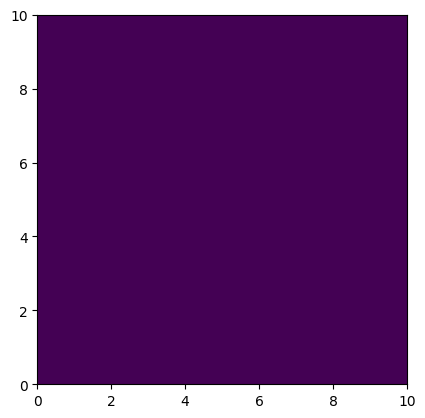

In [15]:
plt.imshow(cutout_hdulist.data, origin='lower')
plt.xlim(0,10)
plt.ylim(0,10)
coord = WCS(cutout_wcs).pixel_to_world([600], [600])
coord